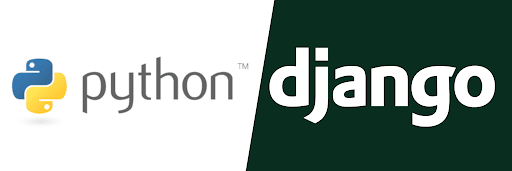


# Admin

django-admin startproject locallibrary

python manage.py startapp catalog



INSTALLED_APPS = ['catalog.apps.CatalogConfig',]

+urls.py

urlpatterns += [url(r'^catalog/', include('catalog.urls')),]



# Model

In [ ]:
class Author(models.Model):
    """
    Model representing an author.
    """
    first_name = models.CharField(max_length=100)
    last_name = models.CharField(max_length=100)
    date_of_birth = models.DateField(null=True, blank=True)
    date_of_death = models.DateField('Died', null=True, blank=True)
    
#     def get_absolute_url(self):
#         """
#         Returns the url to access a particular author instance.
#         """
#         return reverse('author-detail', args=[str(self.id)])
    

#     def __str__(self):
#         """
#         String for representing the Model object.
#         """
#         return '%s, %s' % (self.last_name, self.first_name)



import uuid # Required for unique book instances

class BookInstance(models.Model):
    """
    Model representing a specific copy of a book (i.e. that can be borrowed from the library).
    """
    id = models.UUIDField(primary_key=True, default=uuid.uuid4, help_text="Unique ID for this particular book across whole library")
    book = models.ForeignKey('Book', on_delete=models.SET_NULL, null=True) 
    imprint = models.CharField(max_length=200)
    due_back = models.DateField(null=True, blank=True)

    LOAN_STATUS = (
        ('m', 'Maintenance'),
        ('o', 'On loan'),
        ('a', 'Available'),
        ('r', 'Reserved'),
    )

    status = models.CharField(max_length=1, choices=LOAN_STATUS, blank=True, default='m', help_text='Book availability')

#     class Meta:
#         ordering = ["due_back"]
        

#     def __str__(self):
#         """
#         String for representing the Model object
#         """
#         return '%s (%s)' % (self.id,self.book.title)



from django.urls import reverse #Used to generate URLs by reversing the URL patterns

class Book(models.Model):
    """
    Model representing a book (but not a specific copy of a book).
    """
    title = models.CharField(max_length=200)
    author = models.ForeignKey('Author', on_delete=models.SET_NULL, null=True)
    # Foreign Key used because book can only have one author, but authors can have multiple books
    # Author as a string rather than object because it hasn't been declared yet in the file.
    summary = models.TextField(max_length=1000, help_text="Enter a brief description of the book")
    isbn = models.CharField('ISBN',max_length=13, help_text='13 Character <a href="https://www.isbn-international.org/content/what-isbn">ISBN number</a>')
    genre = models.ManyToManyField(Genre, help_text="Select a genre for this book")
    # ManyToManyField used because genre can contain many books. Books can cover many genres.
    # Genre class has already been defined so we can specify the object above.
    
#     def __str__(self):
#         """
#         String for representing the Model object.
#         """
#         return self.title
    
    
#     def get_absolute_url(self):
#         """
#         Returns the url to access a particular book instance.
#         """
#         return reverse('book-detail', args=[str(self.id)])


class Genre(models.Model):
    """
    Model representing a book genre (e.g. Science Fiction, Non Fiction).
    """
    name = models.CharField(max_length=200, help_text="Enter a book genre (e.g. Science Fiction, French Poetry etc.)")
    
#     def __str__(self):
#         """
#         String for representing the Model object (in Admin site etc.)
#         """
#         return self.name

migration appname
migrate

# Creating a superuser

In [ ]:
python manage.py createsuperuser


admin.py

# model registration

In [ ]:
from .models import Author, Genre, Book, BookInstance
#from . import models

admin.site.register(Book)
admin.site.register(Author)
admin.site.register(Genre)
admin.site.register(BookInstance)

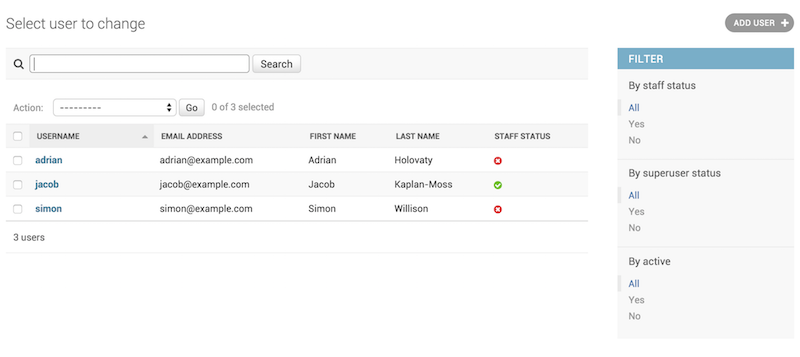

# ModelAdmin class

In [ ]:
# Define the admin class
class AuthorAdmin(admin.ModelAdmin):
    
    pass

# Register the admin class with the associated model
admin.site.register(Author, AuthorAdmin)

# decorator

In [ ]:
# Register the Admin classes for Book using the decorator

@admin.register(Book)
class BookAdmin(admin.ModelAdmin):
    pass

# list_display

In [ ]:
class BookAdmin(admin.ModelAdmin):
    list_display = ('title', 'author', 'display_genre')
    
def display_genre(self):
    """
    Creates a string for the Genre. This is required to display genre in Admin.
    """
    return ', '.join([ genre.name for genre in self.genre.all()[:3] ])

display_genre.short_description = 'Genre'

# list_filter

In [ ]:
class BookInstanceAdmin(admin.ModelAdmin):
    list_filter = ('status', 'due_back')

# fields

In [ ]:
class AuthorAdmin(admin.ModelAdmin):
    list_display = ('last_name', 'first_name', 'date_of_birth', 'date_of_death')
    fields = ['first_name', 'last_name', ('date_of_birth', 'date_of_death')]

# fieldsets

In [ ]:
@admin.register(BookInstance)
class BookInstanceAdmin(admin.ModelAdmin):
    list_filter = ('status', 'due_back')
    
    fieldsets = (
        (None, {
            'fields': ('book', 'imprint', 'id')
        }),
        ('Availability', {
            'fields': ('status', 'due_back')
        }),
    )

# Inline editing 

In [ ]:
class BooksInstanceInline(admin.TabularInline):
    model = BookInstance

@admin.register(Book)
class BookAdmin(admin.ModelAdmin):
    list_display = ('title', 'author', 'display_genre')
    inlines = [BooksInstanceInline]